In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [3]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3),
               filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [4]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [5]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 64s 136ms/step - loss: 0.2436 - accuracy: 0.9253 - val_loss: 0.0512 - val_accuracy: 0.9836
Epoch 2/30
469/469 [==============================] - 51s 108ms/step - loss: 0.0877 - accuracy: 0.9741 - val_loss: 0.0415 - val_accuracy: 0.9869
Epoch 3/30
469/469 [==============================] - 50s 108ms/step - loss: 0.0637 - accuracy: 0.9808 - val_loss: 0.0338 - val_accuracy: 0.9894
Epoch 4/30
469/469 [==============================] - 51s 109ms/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.0292 - val_accuracy: 0.9901
Epoch 5/30
469/469 [==============================] - 50s 107ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0296 - val_accuracy: 0.9906
Epoch 6/30
469/469 [==============================] - 50s 107ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0277 - val_accuracy: 0.9907
Epoch 7/30
469/469 [==============================] - 51s 108ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0250 - val_ac

In [6]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.0308 - accuracy: 0.9932


[0.030811820179224014, 0.9932000041007996]

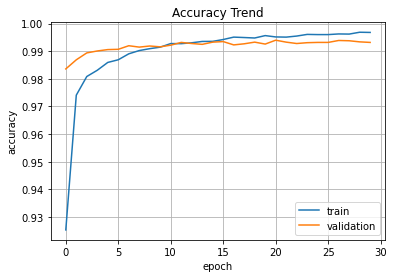

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

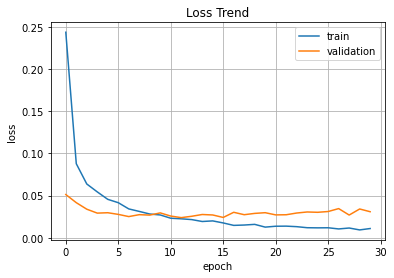

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()